In [1]:
import pandas as pd 
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset

import albumentations

In [124]:
import torchvision
class mymodel(nn.Module):
    def __init__(self, original_models):
        super(mymodel,self).__init__()
        self.num_ftrs = num_ftrs
        
        self.features = nn.Sequential(*(list(original_model.children())[:-1]))
        self.fc1 = nn.Linear(2048, 168)
        # vowel_diacritic
        self.fc2 = nn.Linear(2048, 11)
        # consonant_diacritic
        self.fc3 = nn.Linear(2048, 7)
        
    def forward(self, x):
        x = self.features(x)
        bs, ch, height, width = x.shape
        x = x.view(bs, ch*height*width)
        x1 = self.fc1(x)
        x2 = self.fc2(x)
        x3 = self.fc3(x)
        
        return x1,x2,x3
    
original_model = torchvision.models.resnext50_32x4d(pretrained=True)

for param in original_model.parameters():
    param.requires_grad = False
model = mymodel(original_model).to(device)

In [98]:
summary(original_model.to(device), (3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]           8,192
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]           4,608
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          32,768
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

     BatchNorm2d-125            [-1, 512, 8, 8]           1,024
            ReLU-126            [-1, 512, 8, 8]               0
          Conv2d-127           [-1, 1024, 8, 8]         524,288
     BatchNorm2d-128           [-1, 1024, 8, 8]           2,048
            ReLU-129           [-1, 1024, 8, 8]               0
      Bottleneck-130           [-1, 1024, 8, 8]               0
          Conv2d-131            [-1, 512, 8, 8]         524,288
     BatchNorm2d-132            [-1, 512, 8, 8]           1,024
            ReLU-133            [-1, 512, 8, 8]               0
          Conv2d-134            [-1, 512, 8, 8]          73,728
     BatchNorm2d-135            [-1, 512, 8, 8]           1,024
            ReLU-136            [-1, 512, 8, 8]               0
          Conv2d-137           [-1, 1024, 8, 8]         524,288
     BatchNorm2d-138           [-1, 1024, 8, 8]           2,048
            ReLU-139           [-1, 1024, 8, 8]               0
      Bottleneck-140           [-1, 1024

In [125]:
summary(model.to(device), (3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]           8,192
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]           4,608
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          32,768
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

     BatchNorm2d-125            [-1, 512, 8, 8]           1,024
            ReLU-126            [-1, 512, 8, 8]               0
          Conv2d-127           [-1, 1024, 8, 8]         524,288
     BatchNorm2d-128           [-1, 1024, 8, 8]           2,048
            ReLU-129           [-1, 1024, 8, 8]               0
      Bottleneck-130           [-1, 1024, 8, 8]               0
          Conv2d-131            [-1, 512, 8, 8]         524,288
     BatchNorm2d-132            [-1, 512, 8, 8]           1,024
            ReLU-133            [-1, 512, 8, 8]               0
          Conv2d-134            [-1, 512, 8, 8]          73,728
     BatchNorm2d-135            [-1, 512, 8, 8]           1,024
            ReLU-136            [-1, 512, 8, 8]               0
          Conv2d-137           [-1, 1024, 8, 8]         524,288
     BatchNorm2d-138           [-1, 1024, 8, 8]           2,048
            ReLU-139           [-1, 1024, 8, 8]               0
      Bottleneck-140           [-1, 1024

In [2]:
# download data: https://www.kaggle.com/c/bengaliai-cv19/data

data_dir = '../input/'
files_train =[f'train_image_data_{fid}.parquet' for fid in range(4)]

print(files_train)

['train_image_data_0.parquet', 'train_image_data_1.parquet', 'train_image_data_2.parquet', 'train_image_data_3.parquet']


In [3]:
F = os.path.join(data_dir, files_train[0])

train0 = pd.read_parquet(F)

In [4]:
train0.head()

image_id    0    1    2    3    4    5    6    7    8  ...  32322  32323  \
0  Train_0  254  253  252  253  251  252  253  251  251  ...    253    253   
1  Train_1  251  244  238  245  248  246  246  247  251  ...    255    255   
2  Train_2  251  250  249  250  249  245  247  252  252  ...    254    253   
3  Train_3  247  247  249  253  253  252  251  251  250  ...    254    254   
4  Train_4  249  248  246  246  248  244  242  242  229  ...    255    255   

   32324  32325  32326  32327  32328  32329  32330  32331  
0    253    253    253    253    253    253    253    251  
1    255    255    255    255    255    255    255    254  
2    252    252    253    253    253    253    251    249  
3    254    254    254    253    253    252    251    252  
4    255    255    255    255    255    255    255    255  

[5 rows x 32333 columns]

In [5]:
print('Train Image Data{} Shape is : {}'.format(0, train0.shape))

Train Image Data0 Shape is : (50210, 32333)


데이터가 크기 떄문에, 전체 데이터를 읽을 떄는 parquet으로 읽는것보다 feather형식으로 읽는 것이 30배 정도 더 빠릅니다.

하지만 일부의 데이터만 볼 것이기 때문에 parquet으로 읽어서 진행하겠습니다.

먼저 augmentation을 진행하기 앞서, Dataset을 만들것입니다.

사이즈는 **`137 * 236`** 입니다.

In [6]:
class BengaliDataset(Dataset):
    def __init__(self, df, img_height, img_width):
        self.df = df
        self.img_height = img_height
        self.img_width = img_width

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img = self.df.iloc[idx][0:].values.astype(np.uint8)
        img = img.reshape(self.img_height, self.img_width)
        img = 255 - img
        img = (img*(255.0/img.max())).astype(np.uint8)

        return img

In [7]:
HEIGHT = 137
WIDTH = 236

train0.set_index('image_id', inplace=True)
image = BengaliDataset(train0, img_height=HEIGHT, img_width=WIDTH)

# Albumentation Tutorial

## Original

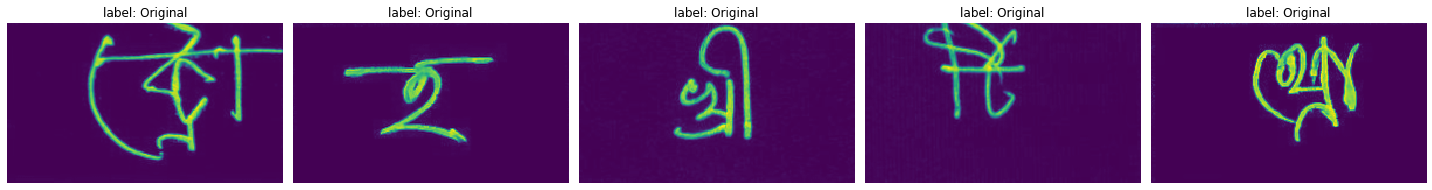

In [110]:
nrow, ncol = 1, 5

fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    img = image[i]
    ax.imshow(img)
    ax.set_title(f'label: Original')
    ax.axis('off')
plt.tight_layout()

## Blur

Blur the input image using a random-sized kernel.

임의크기의 커널을 사용하여 이미지를 흐리게 만듭니다.

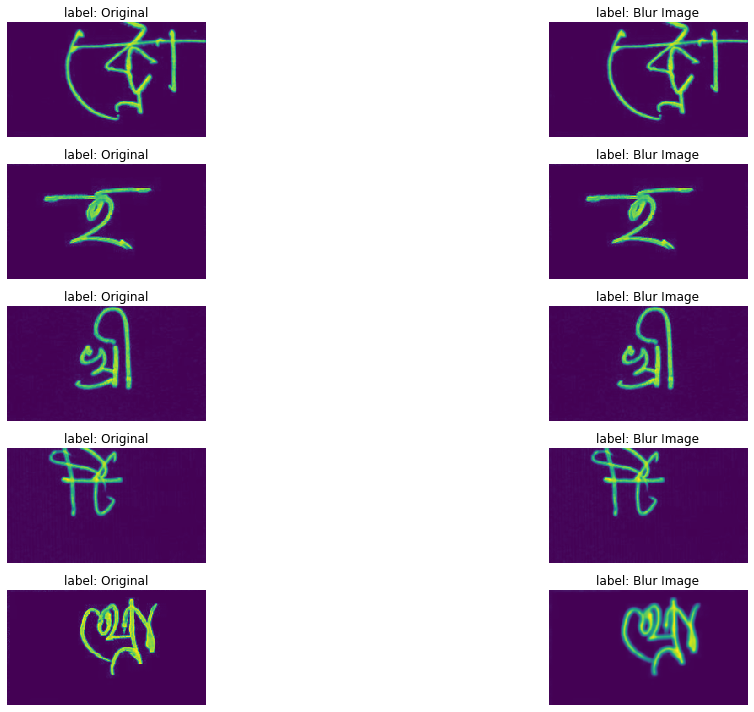

In [101]:
import albumentations as A

aug = A.Blur(p=0.5)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: Blur Image')
    axs[n,1].axis('off')
    
plt.tight_layout()

## Noise

Apply gaussian noise to the input image.

이미지에 noise를 더하여, 좀 더 robust한 결과를 만들도록 합니다.

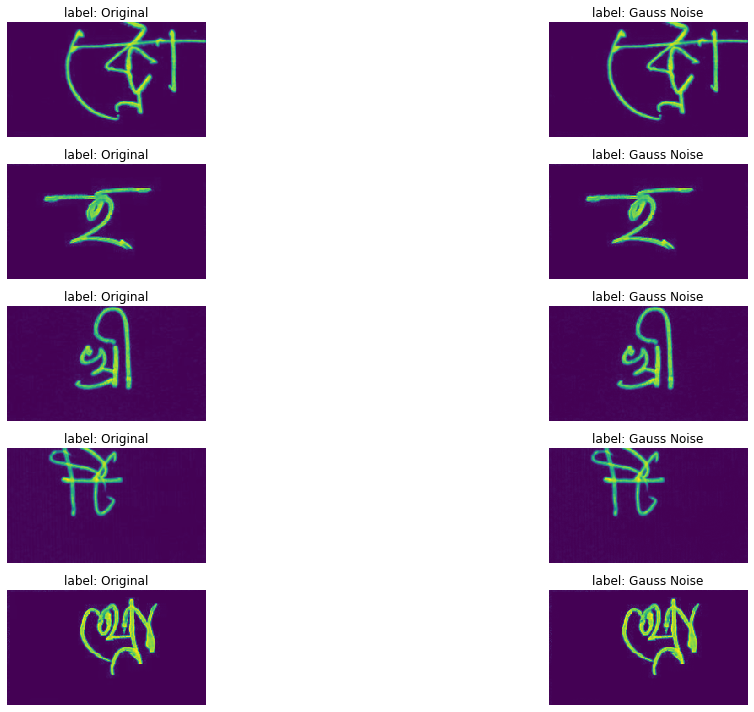

In [102]:
import albumentations as A

aug = A.GaussNoise(var_limit=5. / 255., p=1.0)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: Gauss Noise')
    axs[n,1].axis('off')
    
plt.tight_layout()

## Cut Out

Course Drop out of the square regions in the image.

이미지에서 Dropout을 적용한다고 생각하시면 될 꺼 같습니다.

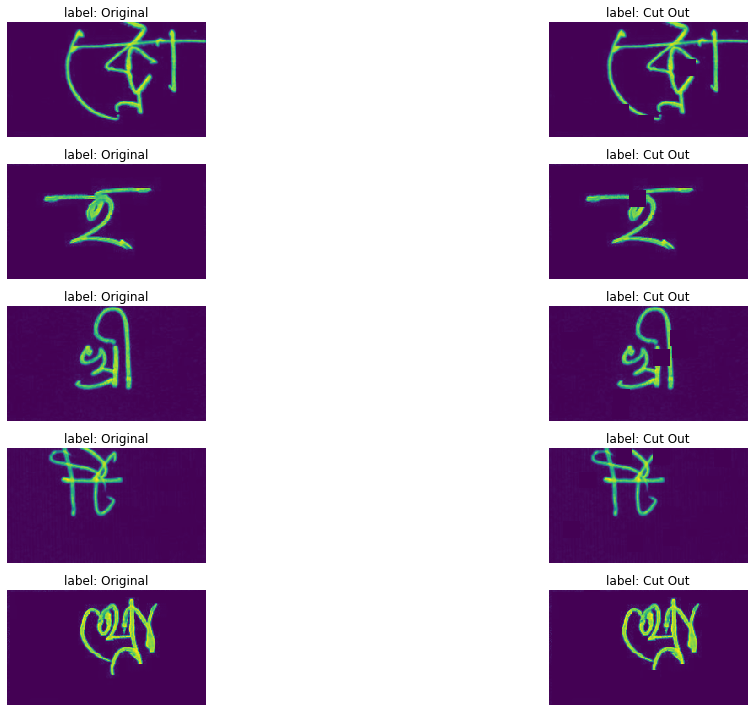

In [109]:
import albumentations as A

aug = A.Cutout(num_holes=8,  max_h_size=20, max_w_size=20, p=1.0)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: Cut Out')
    axs[n,1].axis('off')
    
plt.tight_layout()

## Brightness, Contrast

Randomly change brightness and contrast of the input image.

이미지의 밝기와 대비를 임의로 변경합니다.

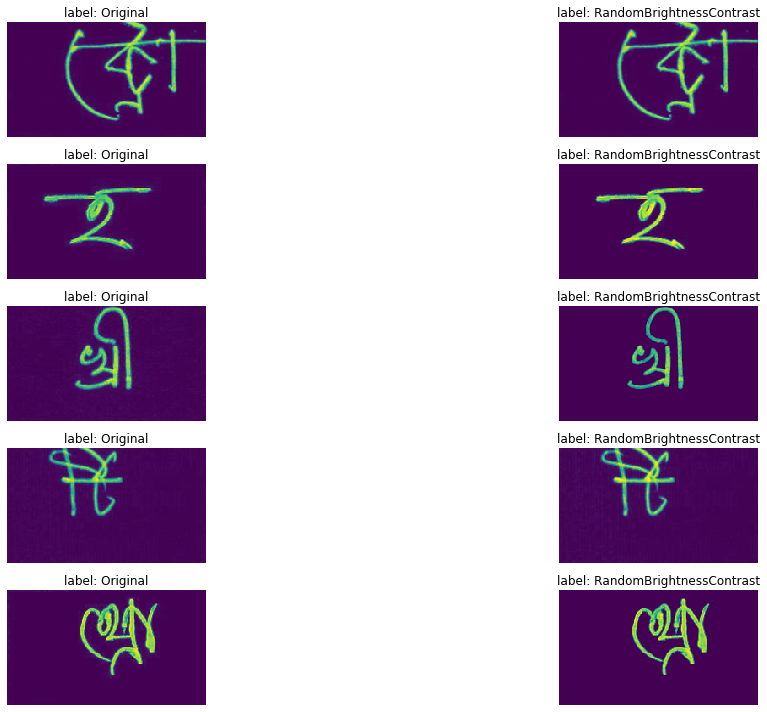

In [111]:
import albumentations as A

aug = A.RandomBrightnessContrast(p=1.0)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: RandomBrightnessContrast')
    axs[n,1].axis('off')
    
plt.tight_layout()

## Scale, Rotate

Randomly apply affine transforms: translate, scale and rotate the input

이미지의 크기나 회전을 임의로 변형시킵니다.

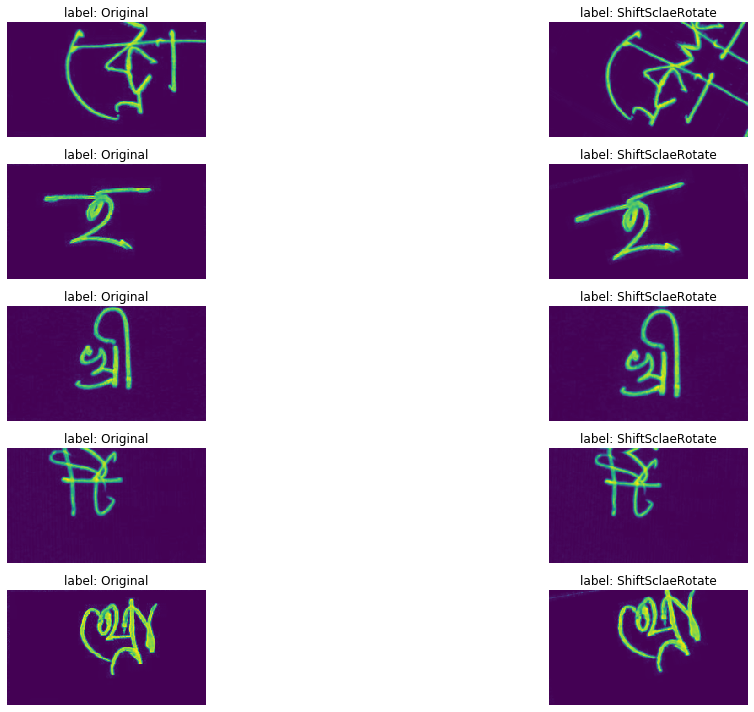

In [112]:
import albumentations as A

aug = A.ShiftScaleRotate(
                shift_limit=0.0625,
                scale_limit=0.1,
                rotate_limit=30,
                p=1.0)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: ShiftSclaeRotate')
    axs[n,1].axis('off')
    
plt.tight_layout()

## Affine

Place a regular grid of points on the input and randomly move the neighbourhood of these point around via affine transformations.

이미지의 격자 내에서 점의 주변을 임의로 이동시킵니다.

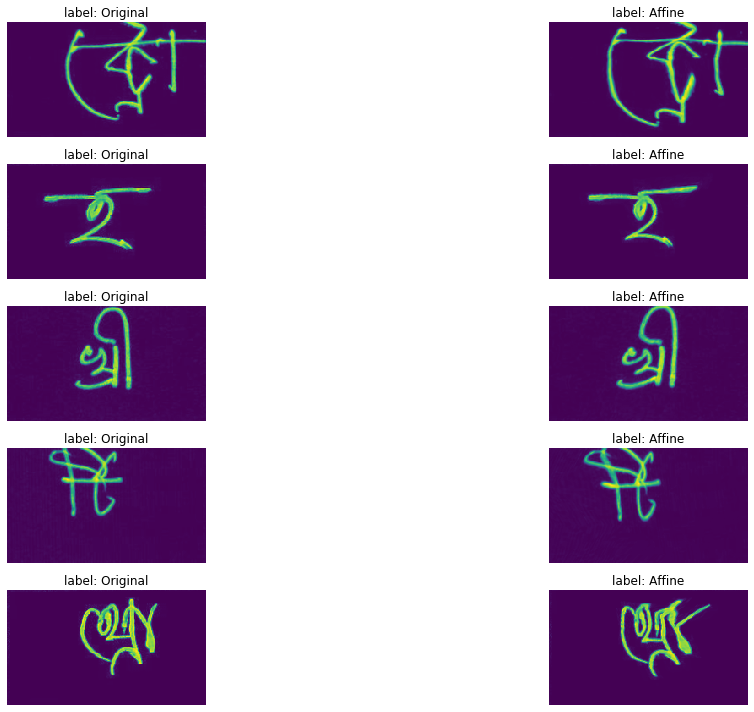

In [119]:
import albumentations as A

aug = A.IAAPiecewiseAffine(p=1.0)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: Affine')
    axs[n,1].axis('off')
    
plt.tight_layout()

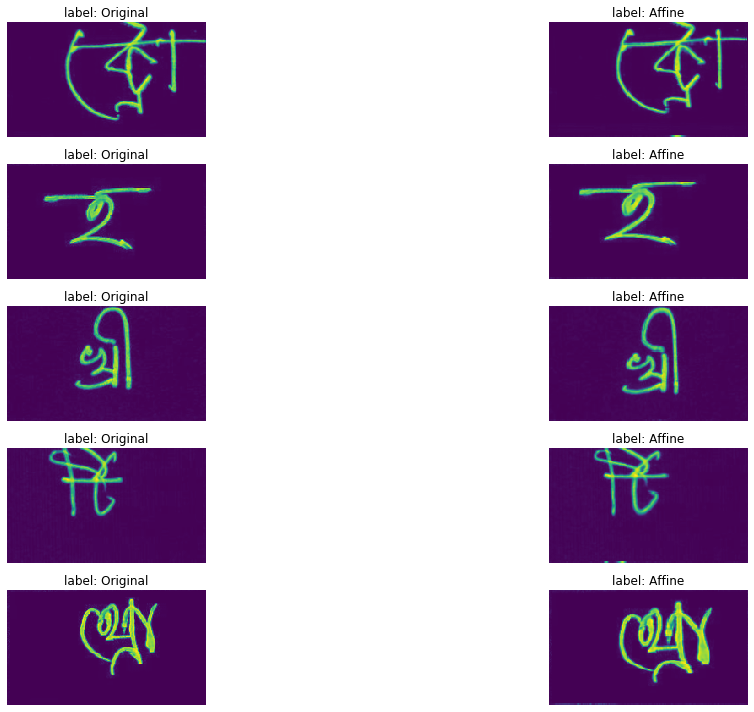

In [60]:
import albumentations as A

aug = A.GridDistortion(num_steps=5, p=1.0)

nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))

for n in range(nrow):
    img = image[n]
    aug_image = aug(image=img)['image']
    
    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_image)
    axs[n,1].set_title(f'label: Affine')
    axs[n,1].axis('off')
    
plt.tight_layout()

# AugMix

Alubumentiation을 기반으로 AugMix가 어떤것인지 알아보겠습니다.

먼저 아래의 사진 4장을 보면서, 대략적인 감을 잡으실 수 있을겁니다.

CutOut - 이미지의 임의의 부분을 제거

MixUp - 이미지 간 확률적으로 두 이미지를 섞습니다.

CutMix - CutOut + MixUp

AugMix - 위에서 소개한 Augmentation기법들을 섞습니다.

<img src='https://storage.googleapis.com/groundai-web-prod/media/users/user_135639/project_400799/images/x1.png'>

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F448347%2Fe9d3259d5b0ef3dadba0238bf3901f1e%2F2020-02-10%2013.50.53.png?generation=1581310282118474&alt=media'>

CIFAR-10 실험결과, AugMix는 다른 기법들보다 우수하게 성적을 냈다고 합니다.

Augmix: https://arxiv.org/abs/1912.02781

Official implementation: https://github.com/google-research/augmix

In [12]:
import albumentations
from albumentations.core.transforms_interface import ImageOnlyTransform
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose, Cutout, CoarseDropout, Normalize
)


class AugMix(ImageOnlyTransform):
    """Augmentations mix to Improve Robustness and Uncertainty.
    Args:
        image (np.ndarray): Raw input image of shape (h, w, c)
        severity (int): Severity of underlying augmentation operators.
        width (int): Width of augmentation chain
        depth (int): Depth of augmentation chain. -1 enables stochastic depth uniformly
          from [1, 3]
        alpha (float): Probability coefficient for Beta and Dirichlet distributions.
        augmentations (list of augmentations): Augmentations that need to mix and perform.
    Targets:
        image
    Image types:
        uint8, float32

    Reference:
    |  https://arxiv.org/abs/1912.02781
    |  https://github.com/google-research/augmix
    """

    def __init__(self, width=2, depth=2, alpha=0.5, augmentations=[HorizontalFlip()], always_apply=False, p=0.5):
        super(AugMix, self).__init__(always_apply, p)
        self.width = width
        self.depth = depth
        self.alpha = alpha
        self.augmentations = augmentations
        self.ws = np.float32(np.random.dirichlet([self.alpha] * self.width))
        self.m = np.float32(np.random.beta(self.alpha, self.alpha))

    def apply_op(self, image, op):
        image = op(image=image)["image"]
        return image

    def apply(self, img, **params):
        mix = np.zeros_like(img)
        for i in range(self.width):
            image_aug = img.copy()

            for _ in range(self.depth):
                op = np.random.choice(self.augmentations)
                image_aug = self.apply_op(image_aug, op)

            mix = np.add(mix, self.ws[i] * image_aug, out=mix, casting="unsafe")

        mixed = (1 - self.m) * img + self.m * mix
        if img.dtype in ["uint8", "uint16", "uint32", "uint64"]:
            mixed = np.clip((mixed), 0, 255).astype(np.uint8)
        return mixed

    def get_transform_init_args_names(self):
        return ("width", "depth", "alpha")

In [77]:
# augs = [A.HorizontalFlip(always_apply=True),
#         A.Blur(always_apply=True),
#         A.ShiftScaleRotate(always_apply=True),
#         A.GaussNoise(always_apply=True),
#         A.Cutout(always_apply=True),
#         A.IAAPiecewiseAffine(always_apply=True)]

# transforms_train = albumentations.Compose([
#     AugMix(width=3, depth=2, alpha=.2, p=1., augmentations=augs),
# ])

trans = Compose([CoarseDropout(p=1.0)], p=1.0)


transforms_train = albumentations.Compose([
    AugMix(width=3, depth=2, alpha=.5, p=1., augmentations=augs),
])

In [60]:
HEIGHT = 137
WIDTH = 236

class Aug_BengaliDataset(Dataset):
    def __init__(self, df, img_height, img_width, transform=None):
        self.df = df
        self.img_height = img_height
        self.img_width = img_width
        self.transform = transform

    def __len__(self):
        return len(self.df)
    

    def __getitem__(self, idx):
        img = self.df.iloc[idx][0:].values.astype(np.uint8)
        img = img.reshape(self.img_height, self.img_width)
        img = 255 - img
        
        if self.transform is not None:
            img = self.transform(image=img)['image']
        else:
            img = img
        return img

In [78]:
# aug_image = Aug_BengaliDataset(train0, img_height=HEIGHT, img_width=WIDTH)
aug_image = Aug_BengaliDataset(train0, img_height=HEIGHT, img_width=WIDTH, transform=trans)

In [75]:
aug_image[0][0].shape

(236,)

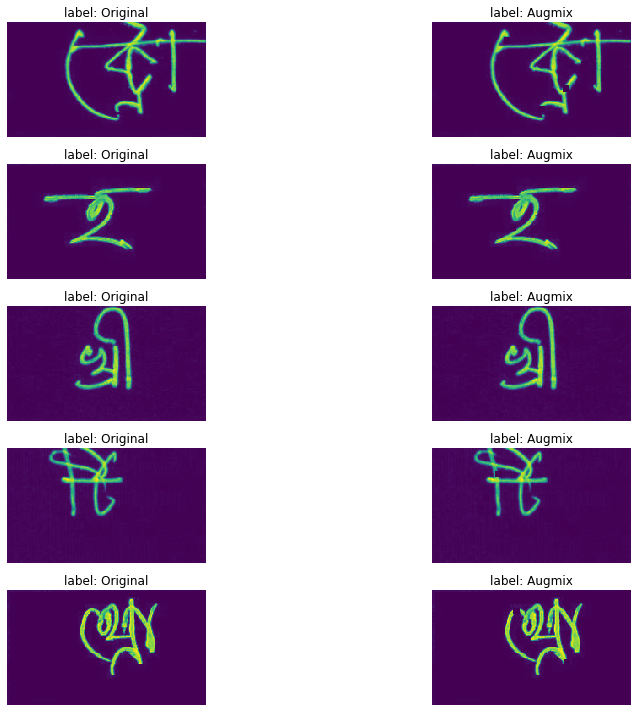

In [79]:
nrow, ncol = 5, 2
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 10))

for n in range(nrow):
    img = image[n]
    aug_img = aug_image[n]

    axs[n,0].imshow(img)
    axs[n,0].set_title(f'label: Original')
    axs[n,0].axis('off')
    
    axs[n,1].imshow(aug_img)
    axs[n,1].set_title(f'label: Augmix')
    axs[n,1].axis('off')
    
plt.tight_layout()
plt.show()

In [15]:
image[0].shape

torch.Size([1, 137, 236])

In [4]:
HEIGHT = 137
WIDTH = 236
SIZE = 128

In [23]:
def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def crop_resize(img0, size=SIZE, pad=16):
    #crop a box around pixels large than the threshold 
    #some images contain line at the sides
    ymin,ymax,xmin,xmax = bbox(img0[5:-5,5:-5] > 60)
    #cropping may cut too much, so we need to add it back
    xmin = xmin - 13 if (xmin > 13) else 0
    ymin = ymin - 10 if (ymin > 10) else 0
    xmax = xmax + 13 if (xmax < WIDTH - 13) else WIDTH
    ymax = ymax + 10 if (ymax < HEIGHT - 10) else HEIGHT
    img = img0[ymin:ymax,xmin:xmax]
    #remove lo intensity pixels as noise
    img[img < 28] = 0
    lx, ly = xmax-xmin,ymax-ymin
    l = max(lx,ly) + pad
    #make sure that the aspect ratio is kept in rescaling
    img = np.pad(img, [((l-ly)//2,), ((l-lx)//2,)], mode='constant')
    return cv2.resize(img,(size,size))

In [19]:
import albumentations
from albumentations.core.transforms_interface import ImageOnlyTransform
from albumentations import HorizontalFlip

class AugMix(ImageOnlyTransform):
    """Augmentations mix to Improve Robustness and Uncertainty.
    Args:
        image (np.ndarray): Raw input image of shape (h, w, c)
        severity (int): Severity of underlying augmentation operators.
        width (int): Width of augmentation chain
        depth (int): Depth of augmentation chain. -1 enables stochastic depth uniformly
          from [1, 3]
        alpha (float): Probability coefficient for Beta and Dirichlet distributions.
        augmentations (list of augmentations): Augmentations that need to mix and perform.
    Targets:
        image
    Image types:
        uint8, float32

    Reference:
    |  https://arxiv.org/abs/1912.02781
    |  https://github.com/google-research/augmix
    """

    def __init__(self, width=2, depth=2, alpha=0.5, augmentations=[HorizontalFlip()], always_apply=False, p=0.5):
        super(AugMix, self).__init__(always_apply, p)
        self.width = width
        self.depth = depth
        self.alpha = alpha
        self.augmentations = augmentations
        self.ws = np.float32(np.random.dirichlet([self.alpha] * self.width))
        self.m = np.float32(np.random.beta(self.alpha, self.alpha))

    def apply_op(self, image, op):
        image = op(image=image)["image"]
        return image

    def apply(self, img, **params):
        mix = np.zeros_like(img)
        for i in range(self.width):
            image_aug = img.copy()

            for _ in range(self.depth):
                op = np.random.choice(self.augmentations)
                image_aug = self.apply_op(image_aug, op)

            mix = np.add(mix, self.ws[i] * image_aug, out=mix, casting="unsafe")

        mixed = (1 - self.m) * img + self.m * mix
        if img.dtype in ["uint8", "uint16", "uint32", "uint64"]:
            mixed = np.clip((mixed), 0, 255).astype(np.uint8)
        return mixed

    def get_transform_init_args_names(self):
        return ("width", "depth", "alpha")

In [20]:
from albumentations import (
    HorizontalFlip, 
    ShiftScaleRotate,
    CoarseDropout,
    GaussNoise,
    MotionBlur,
    MedianBlur,
    IAAPiecewiseAffine
)

augs = [
    GaussNoise(),
    ShiftScaleRotate(),
    CoarseDropout(),
    IAAPiecewiseAffine()]

ValueError: cannot reshape array of size 32331 into shape (137,236)

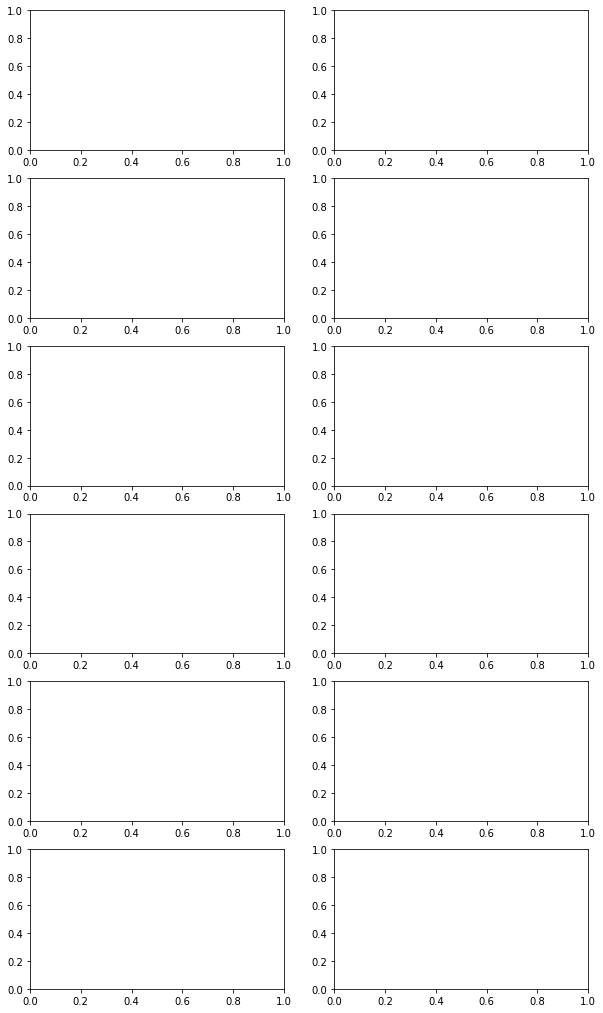

In [21]:
HEIGHT = 137
WIDTH = 236

train0.set_index('image_id', inplace=True)
idx = np.random.randint(len(train0)) 
n_imgs = 6

fig, axs = plt.subplots(n_imgs, 2, figsize=(10, 3*n_imgs))

for n in range(n_imgs):
    #somehow the original input is inverted
    img0 = 255-train0.iloc[idx+n, 1:].values.reshape(HEIGHT, WIDTH).astype(np.uint8)
    #normalize each image by its max val
    img0 = (img0*(255.0/img0.max())).astype(np.uint8)
    
    img1 = aug_(img0)

    axs[n,0].imshow(img0)
    axs[n,0].set_title('Original image')
    axs[n,0].axis('off')
    axs[n,1].imshow(img1)
    axs[n,1].set_title('Crop & resize')
    axs[n,1].axis('off')

plt.tight_layout()
plt.show()

In [83]:
df_train = pd.read_csv('../input/train.csv')
df_train.tail(10)

image_id  grapheme_root  vowel_diacritic  consonant_diacritic  \
200830  Train_200830             39                2                    0   
200831  Train_200831             81                9                    2   
200832  Train_200832             58                9                    0   
200833  Train_200833            130                0                    0   
200834  Train_200834            144                1                    5   
200835  Train_200835             22                7                    2   
200836  Train_200836             65                9                    0   
200837  Train_200837              2                1                    4   
200838  Train_200838            152                9                    0   
200839  Train_200839            127                2                    0   

       grapheme  
200830     চ্চি  
200831     র্নো  
200832       ঢো  
200833      ল্ব  
200834   ষ্প্রা  
200835     র্খে  
200836     ত্তো  
200837     অ্যা  
200838     স্নো  
200839     ল্টি

# Multi-label Stratified Kfold

In [84]:
df_train = pd.read_csv('../input/train.csv')
df_train['id']= df_train['image_id'].apply(lambda x: int(x.split('_')[1]))

In [85]:
df_train.head()

image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme  id
0  Train_0             15                9                    5   ক্ট্রো   0
1  Train_1            159                0                    0        হ   1
2  Train_2             22                3                    5     খ্রী   2
3  Train_3             53                2                    2     র্টি   3
4  Train_4             71                9                    5     থ্রো   4

In [52]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [53]:
X = df_train[ ['id', 'grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].values[:, 0]
y = df_train[ ['id', 'grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].values[:, 1:]

In [54]:
mask = MultilabelStratifiedKFold(n_splits=6, random_state=42)

In [55]:
df_train['fold'] = -1

In [56]:
for i, (trn_idx, val_idx) in enumerate(mask.split(X,y)):
    df_train.loc[val_idx, 'fold'] = i

In [57]:
df_train['fold'].value_counts()

4    33474
1    33474
5    33473
3    33473
2    33473
0    33473
Name: fold, dtype: int64

In [58]:
df_train.to_csv('../input/df_folds.csv', index=False)

# Parquet to Pickle

In [62]:
import joblib
from tqdm import tqdm

In [74]:
for fname in files_train:
    print(fname)

train_image_data_0.parquet
train_image_data_1.parquet
train_image_data_2.parquet
train_image_data_3.parquet


In [88]:
for fname in files_train:
    F = os.path.join(data_dir, fname)
    df_train = pd.read_parquet(F)
    img_ids = df_train['image_id'].values
    img_array = df_train.iloc[:, 1:].values
    
    for idx in tqdm(range(len(df_train))):
        img_id = img_ids[idx]
        img = img_array[idx]
        joblib.dump(img, f'../input/train_images/{img_id}.pkl')


  4%|██▊                                                                         | 1859/50210 [00:14<06:06, 132.01it/s]


  7%|█████▋                                                                      | 3752/50210 [00:28<05:55, 130.77it/s]


 11%|████████▌                                                                   | 5664/50210 [00:43<05:40, 131.01it/s]


 15%|███████████▍                                                                | 7574/50210 [00:57<05:15, 135.19it/s]


 19%|██████████████▎                                                             | 9495/50210 [01:12<05:04, 133.71it/s]


 23%|█████████████████                                                          | 11456/50210 [01:26<04:47, 134.92it/s]


 27%|████████████████████                                                       | 13398/50210 [01:40<04:30, 136.13it/s]


 30%|██████████████████████▊                                                    | 15304/50210 [01:55<04:39, 125.08it/s]


 34%|█████████████████████████▋                                                 | 17220/50210 [02:09<04:17, 128.03it/s]


 38%|████████████████████████████▋                                              | 19218/50210 [02:24<03:32, 145.94it/s]


 42%|███████████████████████████████▊                                           | 21265/50210 [02:38<03:19, 144.79it/s]


 46%|██████████████████████████████████▊                                        | 23285/50210 [02:53<03:16, 137.25it/s]


 50%|█████████████████████████████████████▋                                     | 25262/50210 [03:07<03:21, 123.71it/s]


 54%|████████████████████████████████████████▋                                  | 27238/50210 [03:21<02:47, 137.41it/s]


 58%|███████████████████████████████████████████▋                               | 29236/50210 [03:36<02:34, 135.50it/s]


 62%|██████████████████████████████████████████████▋                            | 31293/50210 [03:50<02:20, 134.48it/s]


 66%|█████████████████████████████████████████████████▊                         | 33319/50210 [04:05<01:59, 141.63it/s]


 70%|████████████████████████████████████████████████████▋                      | 35292/50210 [04:19<01:48, 137.01it/s]


 74%|███████████████████████████████████████████████████████▋                   | 37306/50210 [04:34<01:30, 141.97it/s]


 78%|██████████████████████████████████████████████████████████▋                | 39283/50210 [04:48<01:25, 127.71it/s]


 82%|█████████████████████████████████████████████████████████████▌             | 41191/50210 [05:03<01:06, 135.98it/s]


 86%|████████████████████████████████████████████████████████████████▍          | 43113/50210 [05:17<00:51, 138.12it/s]


 90%|███████████████████████████████████████████████████████████████████▎       | 45052/50210 [05:31<00:37, 138.28it/s]


 94%|██████████████████████████████████████████████████████████████████████▏    | 46980/50210 [05:46<00:23, 139.65it/s]


 97%|█████████████████████████████████████████████████████████████████████████  | 48874/50210 [06:00<00:10, 130.26it/s]


100%|███████████████████████████████████████████████████████████████████████████| 50210/50210 [06:10<00:00, 135.43it/s]

  1%|▋                                                                            | 476/50210 [00:04<06:54, 120.04it/s]


  5%|███▍                                                                        | 2267/50210 [00:18<06:10, 129.24it/s]


  8%|██████▏                                                                     | 4109/50210 [00:32<05:57, 128.79it/s]


 12%|████████▉                                                                   | 5904/50210 [00:47<05:56, 124.40it/s]


 15%|███████████▋                                                                | 7719/50210 [01:01<05:29, 129.04it/s]


 19%|██████████████▍                                                             | 9540/50210 [01:16<05:28, 123.94it/s]


 23%|█████████████████                                                          | 11391/50210 [01:30<05:07, 126.19it/s]


 26%|███████████████████▊                                                       | 13236/50210 [01:45<04:49, 127.73it/s]


 30%|██████████████████████▍                                                    | 14980/50210 [01:59<05:10, 113.45it/s]


 33%|█████████████████████████                                                  | 16750/50210 [02:14<04:15, 130.87it/s]


 37%|███████████████████████████▋                                               | 18571/50210 [02:28<04:18, 122.20it/s]


 40%|██████████████████████████████▎                                            | 20335/50210 [02:43<04:33, 109.33it/s]


 44%|█████████████████████████████████▏                                         | 22193/50210 [02:57<03:28, 134.62it/s]


 48%|███████████████████████████████████▊                                       | 23991/50210 [03:12<03:27, 126.16it/s]


 51%|██████████████████████████████████████▍                                    | 25758/50210 [03:26<03:12, 127.20it/s]


 55%|█████████████████████████████████████████▏                                 | 27593/50210 [03:41<03:10, 118.91it/s]


 59%|███████████████████████████████████████████▉                               | 29430/50210 [03:55<02:47, 124.25it/s]


 62%|██████████████████████████████████████████████▋                            | 31258/50210 [04:10<02:56, 107.61it/s]


 66%|█████████████████████████████████████████████████▎                         | 33036/50210 [04:24<02:18, 124.07it/s]


 69%|████████████████████████████████████████████████████                       | 34829/50210 [04:39<02:17, 111.59it/s]


 73%|██████████████████████████████████████████████████████▋                    | 36606/50210 [04:53<01:44, 130.32it/s]


 77%|█████████████████████████████████████████████████████████▍                 | 38435/50210 [05:08<01:34, 124.75it/s]


 80%|████████████████████████████████████████████████████████████▏              | 40254/50210 [05:22<01:18, 127.56it/s]


 84%|██████████████████████████████████████████████████████████████▊            | 42040/50210 [05:36<01:06, 123.47it/s]


 87%|█████████████████████████████████████████████████████████████████▍         | 43813/50210 [05:51<00:56, 112.55it/s]


 91%|████████████████████████████████████████████████████████████████████▏      | 45625/50210 [06:05<00:35, 128.35it/s]


 95%|██████████████████████████████████████████████████████████████████████▉    | 47468/50210 [06:20<00:23, 118.59it/s]


 98%|█████████████████████████████████████████████████████████████████████████▌ | 49285/50210 [06:34<00:07, 118.20it/s]


100%|███████████████████████████████████████████████████████████████████████████| 50210/50210 [06:42<00:00, 124.81it/s]

  2%|█▎                                                                           | 833/50210 [00:06<06:36, 124.45it/s]


  5%|███▉                                                                        | 2626/50210 [00:21<06:27, 122.69it/s]


  9%|██████▋                                                                     | 4401/50210 [00:35<06:07, 124.58it/s]


 12%|█████████▎                                                                  | 6175/50210 [00:49<06:02, 121.61it/s]


 16%|████████████                                                                | 7972/50210 [01:04<05:15, 133.99it/s]


 20%|██████████████▉                                                             | 9854/50210 [01:18<05:16, 127.43it/s]


 23%|█████████████████▌                                                         | 11725/50210 [01:32<04:43, 135.83it/s]


 27%|████████████████████▏                                                      | 13552/50210 [01:47<04:42, 129.86it/s]


 31%|██████████████████████▉                                                    | 15352/50210 [02:01<04:23, 132.13it/s]


 34%|█████████████████████████▊                                                 | 17245/50210 [02:15<04:12, 130.44it/s]


 38%|████████████████████████████▍                                              | 19077/50210 [02:30<04:00, 129.33it/s]


 42%|███████████████████████████████▎                                           | 20941/50210 [02:44<03:46, 129.38it/s]


 45%|██████████████████████████████████                                         | 22784/50210 [02:59<03:33, 128.63it/s]


 49%|████████████████████████████████████▊                                      | 24676/50210 [03:13<03:09, 134.54it/s]


 53%|███████████████████████████████████████▋                                   | 26552/50210 [03:27<03:06, 127.07it/s]


 57%|██████████████████████████████████████████▌                                | 28456/50210 [03:42<02:53, 125.50it/s]


 60%|█████████████████████████████████████████████▎                             | 30312/50210 [03:56<02:26, 135.62it/s]


 64%|████████████████████████████████████████████████                           | 32179/50210 [04:10<02:46, 108.01it/s]


 68%|██████████████████████████████████████████████████▉                        | 34098/50210 [04:25<01:58, 136.36it/s]


 72%|█████████████████████████████████████████████████████▊                     | 36027/50210 [04:39<01:45, 134.51it/s]


 76%|████████████████████████████████████████████████████████▋                  | 37935/50210 [04:53<01:30, 135.06it/s]


 79%|███████████████████████████████████████████████████████████▌               | 39845/50210 [05:07<01:18, 131.41it/s]


 83%|██████████████████████████████████████████████████████████████▍            | 41778/50210 [05:21<01:00, 138.45it/s]


 87%|█████████████████████████████████████████████████████████████████▎         | 43710/50210 [05:36<00:46, 138.95it/s]


 91%|████████████████████████████████████████████████████████████████████▏      | 45640/50210 [05:50<00:41, 110.55it/s]


 95%|██████████████████████████████████████████████████████████████████████▉    | 47522/50210 [06:04<00:21, 127.26it/s]


 98%|█████████████████████████████████████████████████████████████████████████▊ | 49415/50210 [06:19<00:05, 135.41it/s]


100%|███████████████████████████████████████████████████████████████████████████| 50210/50210 [06:25<00:00, 130.41it/s]

  2%|█▌                                                                          | 1066/50210 [00:08<06:06, 134.02it/s]


  6%|████▍                                                                       | 2956/50210 [00:22<05:47, 135.84it/s]


 10%|███████▎                                                                    | 4864/50210 [00:37<06:05, 123.97it/s]


 13%|██████████▏                                                                 | 6766/50210 [00:51<05:47, 124.95it/s]


 17%|█████████████                                                               | 8626/50210 [01:05<05:10, 134.03it/s]


 21%|███████████████▌                                                           | 10407/50210 [01:20<05:11, 127.82it/s]


 24%|██████████████████▎                                                        | 12287/50210 [01:34<04:38, 136.10it/s]


 28%|█████████████████████▏                                                     | 14207/50210 [01:49<04:33, 131.42it/s]


 32%|████████████████████████                                                   | 16130/50210 [02:03<04:09, 136.74it/s]


 36%|██████████████████████████▉                                                | 18010/50210 [02:17<04:16, 125.42it/s]


 40%|█████████████████████████████▋                                             | 19833/50210 [02:32<03:40, 137.98it/s]


 43%|████████████████████████████████▍                                          | 21725/50210 [02:46<03:29, 136.01it/s]


 47%|███████████████████████████████████▎                                       | 23612/50210 [03:00<03:32, 125.05it/s]


 51%|█████████████████████████████████████▉                                     | 25435/50210 [03:15<03:13, 127.97it/s]


 54%|████████████████████████████████████████▊                                  | 27341/50210 [03:29<02:47, 136.51it/s]


 58%|███████████████████████████████████████████▋                               | 29258/50210 [03:43<02:32, 137.09it/s]


 62%|██████████████████████████████████████████████▌                            | 31151/50210 [03:58<02:34, 123.14it/s]


 66%|█████████████████████████████████████████████████▎                         | 32984/50210 [04:12<02:10, 132.06it/s]


 69%|███████████████████████████████████████████████████▉                       | 34808/50210 [04:26<02:00, 128.09it/s]


 73%|██████████████████████████████████████████████████████▊                    | 36660/50210 [04:41<01:43, 130.43it/s]


 77%|█████████████████████████████████████████████████████████▌                 | 38508/50210 [04:55<01:28, 131.77it/s]


 80%|████████████████████████████████████████████████████████████▎              | 40359/50210 [05:09<01:16, 129.39it/s]


 84%|███████████████████████████████████████████████████████████████            | 42226/50210 [05:24<01:00, 131.10it/s]


 88%|█████████████████████████████████████████████████████████████████▊         | 44021/50210 [05:38<00:47, 130.27it/s]


 91%|████████████████████████████████████████████████████████████████████▍      | 45820/50210 [05:53<00:35, 125.23it/s]


 95%|███████████████████████████████████████████████████████████████████████▏   | 47682/50210 [06:07<00:20, 125.28it/s]


 99%|██████████████████████████████████████████████████████████████████████████ | 49580/50210 [06:21<00:04, 132.83it/s]


100%|███████████████████████████████████████████████████████████████████████████| 50210/50210 [06:26<00:00, 129.85it/s]


# Test

In [1]:
import pandas as pd 
import numpy as np
import joblib
from tqdm import tqdm
import os

In [2]:
data_dir = '../input/'
files_train =[f'test_image_data_{fid}.parquet' for fid in range(4)]

In [27]:
F = os.path.join(data_dir, files_train[1])
F

'../input/test_image_data_1.parquet'

In [28]:
test = pd.read_parquet(F)

In [29]:
test.tail()

image_id    0    1    2    3    4    5    6    7    8  ...  32322  32323  \
0   Test_3  199  227  236  241  238  242  245  243  243  ...    222    222   
1   Test_4  243  246  251  252  251  249  250  250  251  ...    251    252   
2   Test_5  251  250  250  251  252  254  252  251  251  ...    253    253   

   32324  32325  32326  32327  32328  32329  32330  32331  
0    226    224    222    227    220    208    194    136  
1    252    252    252    253    253    253    253    253  
2    252    252    252    253    252    249    248    249  

[3 rows x 32333 columns]

In [14]:
train=pd.read_csv('../input/train.csv')

In [15]:
train.head()

image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme
0  Train_0             15                9                    5   ক্ট্রো
1  Train_1            159                0                    0        হ
2  Train_2             22                3                    5     খ্রী
3  Train_3             53                2                    2     র্টি
4  Train_4             71                9                    5     থ্রো

In [37]:
test1.head()

row_id image_id            component
0  Test_0_consonant_diacritic   Test_0  consonant_diacritic
1        Test_0_grapheme_root   Test_0        grapheme_root
2      Test_0_vowel_diacritic   Test_0      vowel_diacritic
3  Test_1_consonant_diacritic   Test_1  consonant_diacritic
4        Test_1_grapheme_root   Test_1        grapheme_root

In [43]:
test1.drop(['row_id','component'], axis=1, inplace=True)

In [48]:
test1.drop_duplicates(inplace=True)

In [49]:
test1

image_id
0    Test_0
3    Test_1
6    Test_2
9    Test_3
12   Test_4
15   Test_5
18   Test_6
21   Test_7
24   Test_8
27   Test_9
30  Test_10
33  Test_11

In [40]:
np.unique(test1['image_id'])

array(['Test_0', 'Test_1', 'Test_10', 'Test_11', 'Test_2', 'Test_3',
       'Test_4', 'Test_5', 'Test_6', 'Test_7', 'Test_8', 'Test_9'],
      dtype=object)

In [52]:
df_test=pd.read_csv('../input/test.csv')

In [ ]:
tedf_test

In [54]:
for fname in files_train:
    F = os.path.join(data_dir, fname)
    df_test = pd.read_parquet(F)
    img_ids = df_test['image_id'].values
    img_array = df_test.iloc[:, 1:].values
    
    for idx in tqdm(range(len(df_test))):
        img_id = img_ids[idx]
        img = img_array[idx]
        joblib.dump(img, f'../input/test_images/{img_id}.pkl')

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 136.21it/s]


In [22]:
import cv2

In [25]:
def Resize(df,size=64):
    resized = {} 
    df = df.set_index('image_id')
    for i in tqdm(range(df.shape[0])):
#         image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(size,size))
        resized[df.index[i]] = image.reshape(-1)
    resized = pd.DataFrame(resized).T.reset_index()
    resized.columns = resized.columns.astype(str)
    resized.rename(columns={'index':'image_id'},inplace=True)
    return resized

In [58]:
transforms_train = albumentations.Compose([
    AugMix(width=3, depth=2, alpha=.2, p=1., augmentations=augs),
])

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.utils.data import Dataset

import cv2
import time
import random
import os
import matplotlib.pyplot as plt
import joblib

class BengaliDataset(Dataset):
    def __init__(self, csv, img_height, img_width, transform=None):
        self.csv = csv.reset_index()
        self.img_ids = csv['image_id'].values
        self.img_height = img_height
        self.img_width = img_width
        self.transform = transform

    def __len__(self):
        return len(self.csv)

    def __getitem__(self, index):
        img_id = self.img_ids[index]
        img = joblib.load(f'../input/train_images/{img_id}.pkl')
        img = img.reshape(self.img_height, self.img_width)
        img = 255 - img
        img = (img*(255.0/img.max())).astype(np.uint8)
        img = crop_resize(img)

        if self.transform is not None:
            res = self.transform(image=img)
            img = res['image']
        else:
            img = img

        img = img[:, :, np.newaxis]

        label_1 = self.csv.iloc[index].grapheme_root
        label_2 = self.csv.iloc[index].vowel_diacritic
        label_3 = self.csv.iloc[index].consonant_diacritic

        return (
            torch.tensor(img, dtype=torch.float).permute(2, 0, 1),
            torch.tensor(label_1, dtype=torch.long),
            torch.tensor(label_2, dtype=torch.long),
            torch.tensor(label_3, dtype=torch.long)
        )

In [88]:
df_train = pd.read_csv('../input/train.csv')
df_train['fold'] = pd.read_csv('../input/df_folds.csv')['fold']

trn_fold = [i for i in range(6) if i not in [5]]
vid_fold = [5]

trn_idx = df_train.loc[df_train['fold'].isin(trn_fold)].index
vid_idx = df_train.loc[df_train['fold'].isin(vid_fold)].index

trn_dataset = BengaliDataset(csv=df_train.iloc[trn_idx], img_height=HEIGHT, img_width=WIDTH, transform=transforms_train)
vid_dataset = BengaliDataset(csv=df_train.iloc[vid_idx], img_height=HEIGHT, img_width=WIDTH)

In [90]:
trn_dataset[3][0].shape

torch.Size([1, 128, 128])

In [91]:
a = trn_dataset[3][0].squeeze()

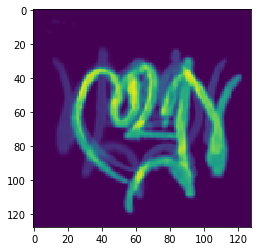

In [92]:
fig,ax = plt.subplots(1,1)
ax.imshow(a)

In [13]:
a = torch.rand(32,64,128,128)

In [14]:
layer= nn.AdaptiveAvgPool2d(1)

In [15]:
b = layer(a)
b.size()

torch.Size([32, 64, 1, 1])

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        
        # grapheme_root
        self.fc1 = nn.Linear(512, 168)
        # vowel_diacritic
        self.fc2 = nn.Linear(512, 11)
        # consonant_diacritic
        self.fc3 = nn.Linear(512, 7)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        bs, _, _, _ = out.shape
        out = F.adaptive_avg_pool2d(out, 1).reshape(bs, -1)
        out = out.view(out.size(0), -1)

        x1 = self.fc1(out)
        x2 = self.fc2(out)
        x3 = self.fc3(out)
        return x1, x2, x3

def ResNet18():
    return ResNet(BasicBlock, [2,2,2,2])

def ResNet34():
    return ResNet(BasicBlock, [3,4,6,3])

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu" 
model =ResNet34().to(device)

In [16]:
from torchsummary import summary
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,728
       BatchNorm2d-2         [-1, 64, 128, 128]             128
            Conv2d-3         [-1, 64, 128, 128]          36,864
       BatchNorm2d-4         [-1, 64, 128, 128]             128
            Conv2d-5         [-1, 64, 128, 128]          36,864
       BatchNorm2d-6         [-1, 64, 128, 128]             128
        BasicBlock-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,864
       BatchNorm2d-9         [-1, 64, 128, 128]             128
           Conv2d-10         [-1, 64, 128, 128]          36,864
      BatchNorm2d-11         [-1, 64, 128, 128]             128
       BasicBlock-12         [-1, 64, 128, 128]               0
           Conv2d-13         [-1, 64, 128, 128]          36,864
      BatchNorm2d-14         [-1, 64, 1

In [166]:
import joblib
img = joblib.load(f'../input/train_images/Train_0.pkl')
img = img.reshape(137, 236)

In [167]:
img = 255 - img

In [168]:
img

array([[1, 2, 3, ..., 1, 2, 4],
       [0, 2, 2, ..., 1, 2, 3],
       [0, 0, 0, ..., 1, 1, 2],
       ...,
       [1, 1, 2, ..., 2, 1, 3],
       [1, 1, 1, ..., 2, 2, 3],
       [1, 1, 1, ..., 2, 2, 4]], dtype=uint8)

In [170]:
(img*(255.0/img.max()))

array([[1.0944206, 2.1888412, 3.2832618, ..., 1.0944206, 2.1888412,
        4.3776824],
       [0.       , 2.1888412, 2.1888412, ..., 1.0944206, 2.1888412,
        3.2832618],
       [0.       , 0.       , 0.       , ..., 1.0944206, 1.0944206,
        2.1888412],
       ...,
       [1.0944206, 1.0944206, 2.1888412, ..., 2.1888412, 1.0944206,
        3.2832618],
       [1.0944206, 1.0944206, 1.0944206, ..., 2.1888412, 2.1888412,
        3.2832618],
       [1.0944206, 1.0944206, 1.0944206, ..., 2.1888412, 2.1888412,
        4.3776824]])

In [158]:
img = (img*(255.0/img.max())).astype(np.uint8)

In [159]:
img

array([[1, 2, 3, ..., 1, 2, 4],
       [0, 2, 2, ..., 1, 2, 3],
       [0, 0, 0, ..., 1, 1, 2],
       ...,
       [1, 1, 2, ..., 2, 1, 3],
       [1, 1, 1, ..., 2, 2, 3],
       [1, 1, 1, ..., 2, 2, 4]], dtype=uint8)

In [165]:
(3*(255.0/233.0))

3.2832618025751072

In [160]:
img.max()

254

In [16]:
a = torch.LongTensor(3).random_(0, 10)

In [19]:
a = torch.rand(32,168)
b = torch.rand(32,11)
c = torch.rand(32,7)

pred = torch.cat((a,b,c),dim=1)

In [21]:
test = torch.split(pred, [168, 11, 7], dim=1)

In [24]:
label = [torch.argmax(py, dim=1).cpu().numpy() for py in test]

In [25]:
label

[array([131,  96, 111,  79, 141,  98, 144, 117,  15, 153, 121, 133, 144,
          2,  81,  55,  10, 138,  51, 114,  51, 145, 139, 146,  81,  63,
        166, 143,  93, 161, 119,  77], dtype=int64),
 array([ 2,  9, 10,  7,  5,  9,  4,  3,  6,  2,  4,  3,  3,  0,  1,  1,  6,
         2,  2,  2,  1, 10,  8,  2,  3,  7, 10,  0,  3,  3,  1,  6],
       dtype=int64),
 array([1, 0, 6, 4, 1, 1, 2, 2, 4, 4, 3, 3, 1, 2, 6, 6, 3, 6, 3, 6, 6, 0,
        2, 6, 1, 2, 0, 1, 2, 5, 1, 3], dtype=int64)]

In [29]:
true_label1 = torch.LongTensor(32).random_(1, 168)
true_label2 = torch.LongTensor(32).random_(1, 11)
true_label3 = torch.LongTensor(32).random_(1, 7)

true_label = []
true_label.append(torch.stack( (true_label1, true_label2, true_label3), dim=1))

In [32]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0], 
                           'C': ['1.1.2010', '2.1.2011', '3.1.2011'], 
                           'D': ['1 days', '2 days', '3 days'],
                           'E': ['1', '2', '3']})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
A    3 non-null int64
B    3 non-null float64
C    3 non-null object
D    3 non-null object
E    3 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 248.0+ bytes


In [43]:
{i:df[i].dtypes for i in df.columns}

{'A': dtype('int64'),
 'B': dtype('float64'),
 'C': dtype('O'),
 'D': dtype('O'),
 'E': dtype('O')}

In [41]:
df['A'].dtypes

dtype('int64')

In [1]:
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

resnext50_32x4d = models.resnext50_32x4d(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to C:\Users\pushp/.cache\torch\checkpoints\resnext50_32x4d-7cdf4587.pth
100%|█████████████████████████████████████████████████████████████████████████████| 95.8M/95.8M [00:10<00:00, 9.75MB/s]


In [5]:
resnext50_32x4d.fc= nn.Linear(2048, 168)

In [7]:
resnext50_32x4d.fc.in_features

2048

In [11]:
import torch
model = torch.nn.Sequential(*(list(resnext50_32x4d.children())[:-1]))

In [15]:
from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
                           ('fc1', nn.Linear(2048, 168)),
                           ('fc2', nn.Linear(2048, 11)),
                           ('fc3', nn.Linear(2048, 7))
                           ]))

In [18]:
model = nn.Sequential(
    model,
    nn.Linear(2048, 168),
    nn.Linear(2048, 11),
    nn.Linear(2048, 7)
)

In [27]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

model_ft = models.resnext50_32x4d(pretrained=True)
set_parameter_requires_grad(model_ft, True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 168)
model_ft.fc2 = nn.Linear(num_ftrs, 11)
model_ft.fc3 = nn.Linear(num_ftrs, 7)

In [44]:
import torch
import torch.nn as nn
from torchvision import models

original_model = models.alexnet(pretrained=True)

class AlexNetConv4(nn.Module):
            def __init__(self):
                super(AlexNetConv4, self).__init__()
                self.features = nn.Sequential(
                    # stop at conv4
                    *list(original_model.features.children())[:-3]
                )
            def forward(self, x):
                x = self.features(x)
                return x

model = AlexNetConv4()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\pushp/.cache\torch\checkpoints\alexnet-owt-4df8aa71.pth
100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [00:24<00:00, 9.85MB/s]


In [72]:
original_model = models.resnext50_32x4d(pretrained=True)
num_ftrs = original_model.fc.in_features

class mymodel(nn.Module):
            def __init__(self):
                super(mymodel,self).__init__()
                self.features = nn.Sequential(*(list(original_model.children())[:-1]))
                self.fc1 = nn.Linear(num_ftrs, 168)
                # vowel_diacritic
                self.fc2 = nn.Linear(num_ftrs, 11)
                # consonant_diacritic
                self.fc3 = nn.Linear(num_ftrs, 7)
                
            def forward(self, x):
                x = self.features(x)
                x = x.squeeze()
                x1 = self.fc1(x)
                x2 = self.fc2(x)
                x3 = self.fc3(x)
                
                return x1,x2,x3

a = mymodel().to(device)

In [64]:
original_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [73]:
x = torch.rand(1, 3,128,128).to(device)

s,d,c = a(x)

In [74]:
s

tensor([-6.8126e-01, -2.2287e-01,  4.3138e-01, -4.4703e-01,  1.2024e-01,
        -1.7718e-01, -2.9057e-01,  2.4569e-01,  7.1145e-01, -1.6446e-02,
        -2.1168e-01, -6.5375e-02,  1.2475e-01,  2.3326e-01, -2.4512e-01,
         4.9908e-01, -1.5803e-01,  5.1179e-02, -2.7023e-01, -2.0048e-01,
         3.4282e-01, -3.6446e-01, -2.5395e-01, -6.0618e-02,  2.3104e-01,
        -5.0246e-02, -1.7387e-01, -2.3810e-01, -1.6699e-01, -1.1366e-01,
         7.2585e-02, -4.1516e-01,  2.1813e-01, -1.3402e-01,  3.3049e-01,
         1.2121e-01, -7.4111e-01, -2.1734e-01,  2.6667e-01, -4.0110e-01,
         2.6749e-01,  5.9324e-01, -3.6653e-03,  4.5344e-01, -1.7423e-02,
         4.6107e-01, -7.1963e-03, -2.6877e-01,  1.3693e-01,  1.4256e-01,
        -1.9255e-01,  1.2157e-03, -5.3357e-02,  1.9513e-01,  3.7671e-01,
        -3.1789e-01,  2.1853e-01,  2.3204e-01, -1.9289e-01, -6.7054e-02,
         6.5478e-02, -4.4199e-02, -2.1400e-01, -6.2375e-02,  7.4175e-01,
        -1.6265e-01,  1.4613e-01, -4.6917e-02,  2.7

In [29]:
from torchsummary import summary
device = "cuda" if torch.cuda.is_available() else "cpu" 
model_ft = model_ft.to(device)
summary(model_ft, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]           8,192
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]           4,608
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 256, 32, 32]          32,768
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,